### Problem statement:

Develop a predictive model using demographic and behavioral data to predict customer churn. By analyzing key factors contributing to churn, the model aims to classify customers as churners or non-churners, aiding the telecom company in implementing proactive retention strategies to enhance customer satisfaction and loyalty.

##### Step 1: Data Loading and Exploration

In [1]:
import pandas as pd

# Load the telecom dataset into a Pandas DataFrame
telecom_data = pd.read_csv("C:/Users/hp/OneDrive/Documents/Datasets/Telecom_Data.csv")



In [2]:
# Creatimg DataFrame from the loaded data
df = pd.DataFrame(telecom_data)

# Displaying the first few rows of the DataFrame
df.head()



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Information about DataFrame including data types and non-null values
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Count of unique values in each column
print(df.nunique())


state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


In [5]:
# Summary statistics of numerical variables
print(df.describe())



       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

##### Step 2: Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split

# 'Churn' is the target variable
x = telecom_data.drop(['churn', 'phone number'], axis=1)  # Features
y = telecom_data['churn']  # Target variable

# Perform one-hot encoding on categorical features
x = pd.get_dummies(x)


# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


##### Step 3: Model Training

In [52]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
model = DecisionTreeClassifier()

# Train the classifier on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier()

##### Step 4: Model Evaluation

In [53]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [54]:
# Evaluate the model using confusion matrix

from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf)



Confusion Matrix:
[[829  44]
 [ 41  86]]


In [55]:
# Evaluate the model using classification report

from sklearn.metrics import classification_report
clf = classification_report(y_test,  y_pred)
print("Classification Report:")
print(clf)



Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       873
        True       0.66      0.68      0.67       127

    accuracy                           0.92      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.92      0.92      0.92      1000



The classification report indicates that the model performs well overall, with high precision, recall, and F1-score for the 'False' class (not churn). However, it performs less optimally for the 'True' class (churn), with lower precision, recall, and F1-score. Overall accuracy is high at 92%, indicating that the model effectively predicts non-churn cases but may struggle with identifying churn cases accurately.

##### Step 5: Model Visualization

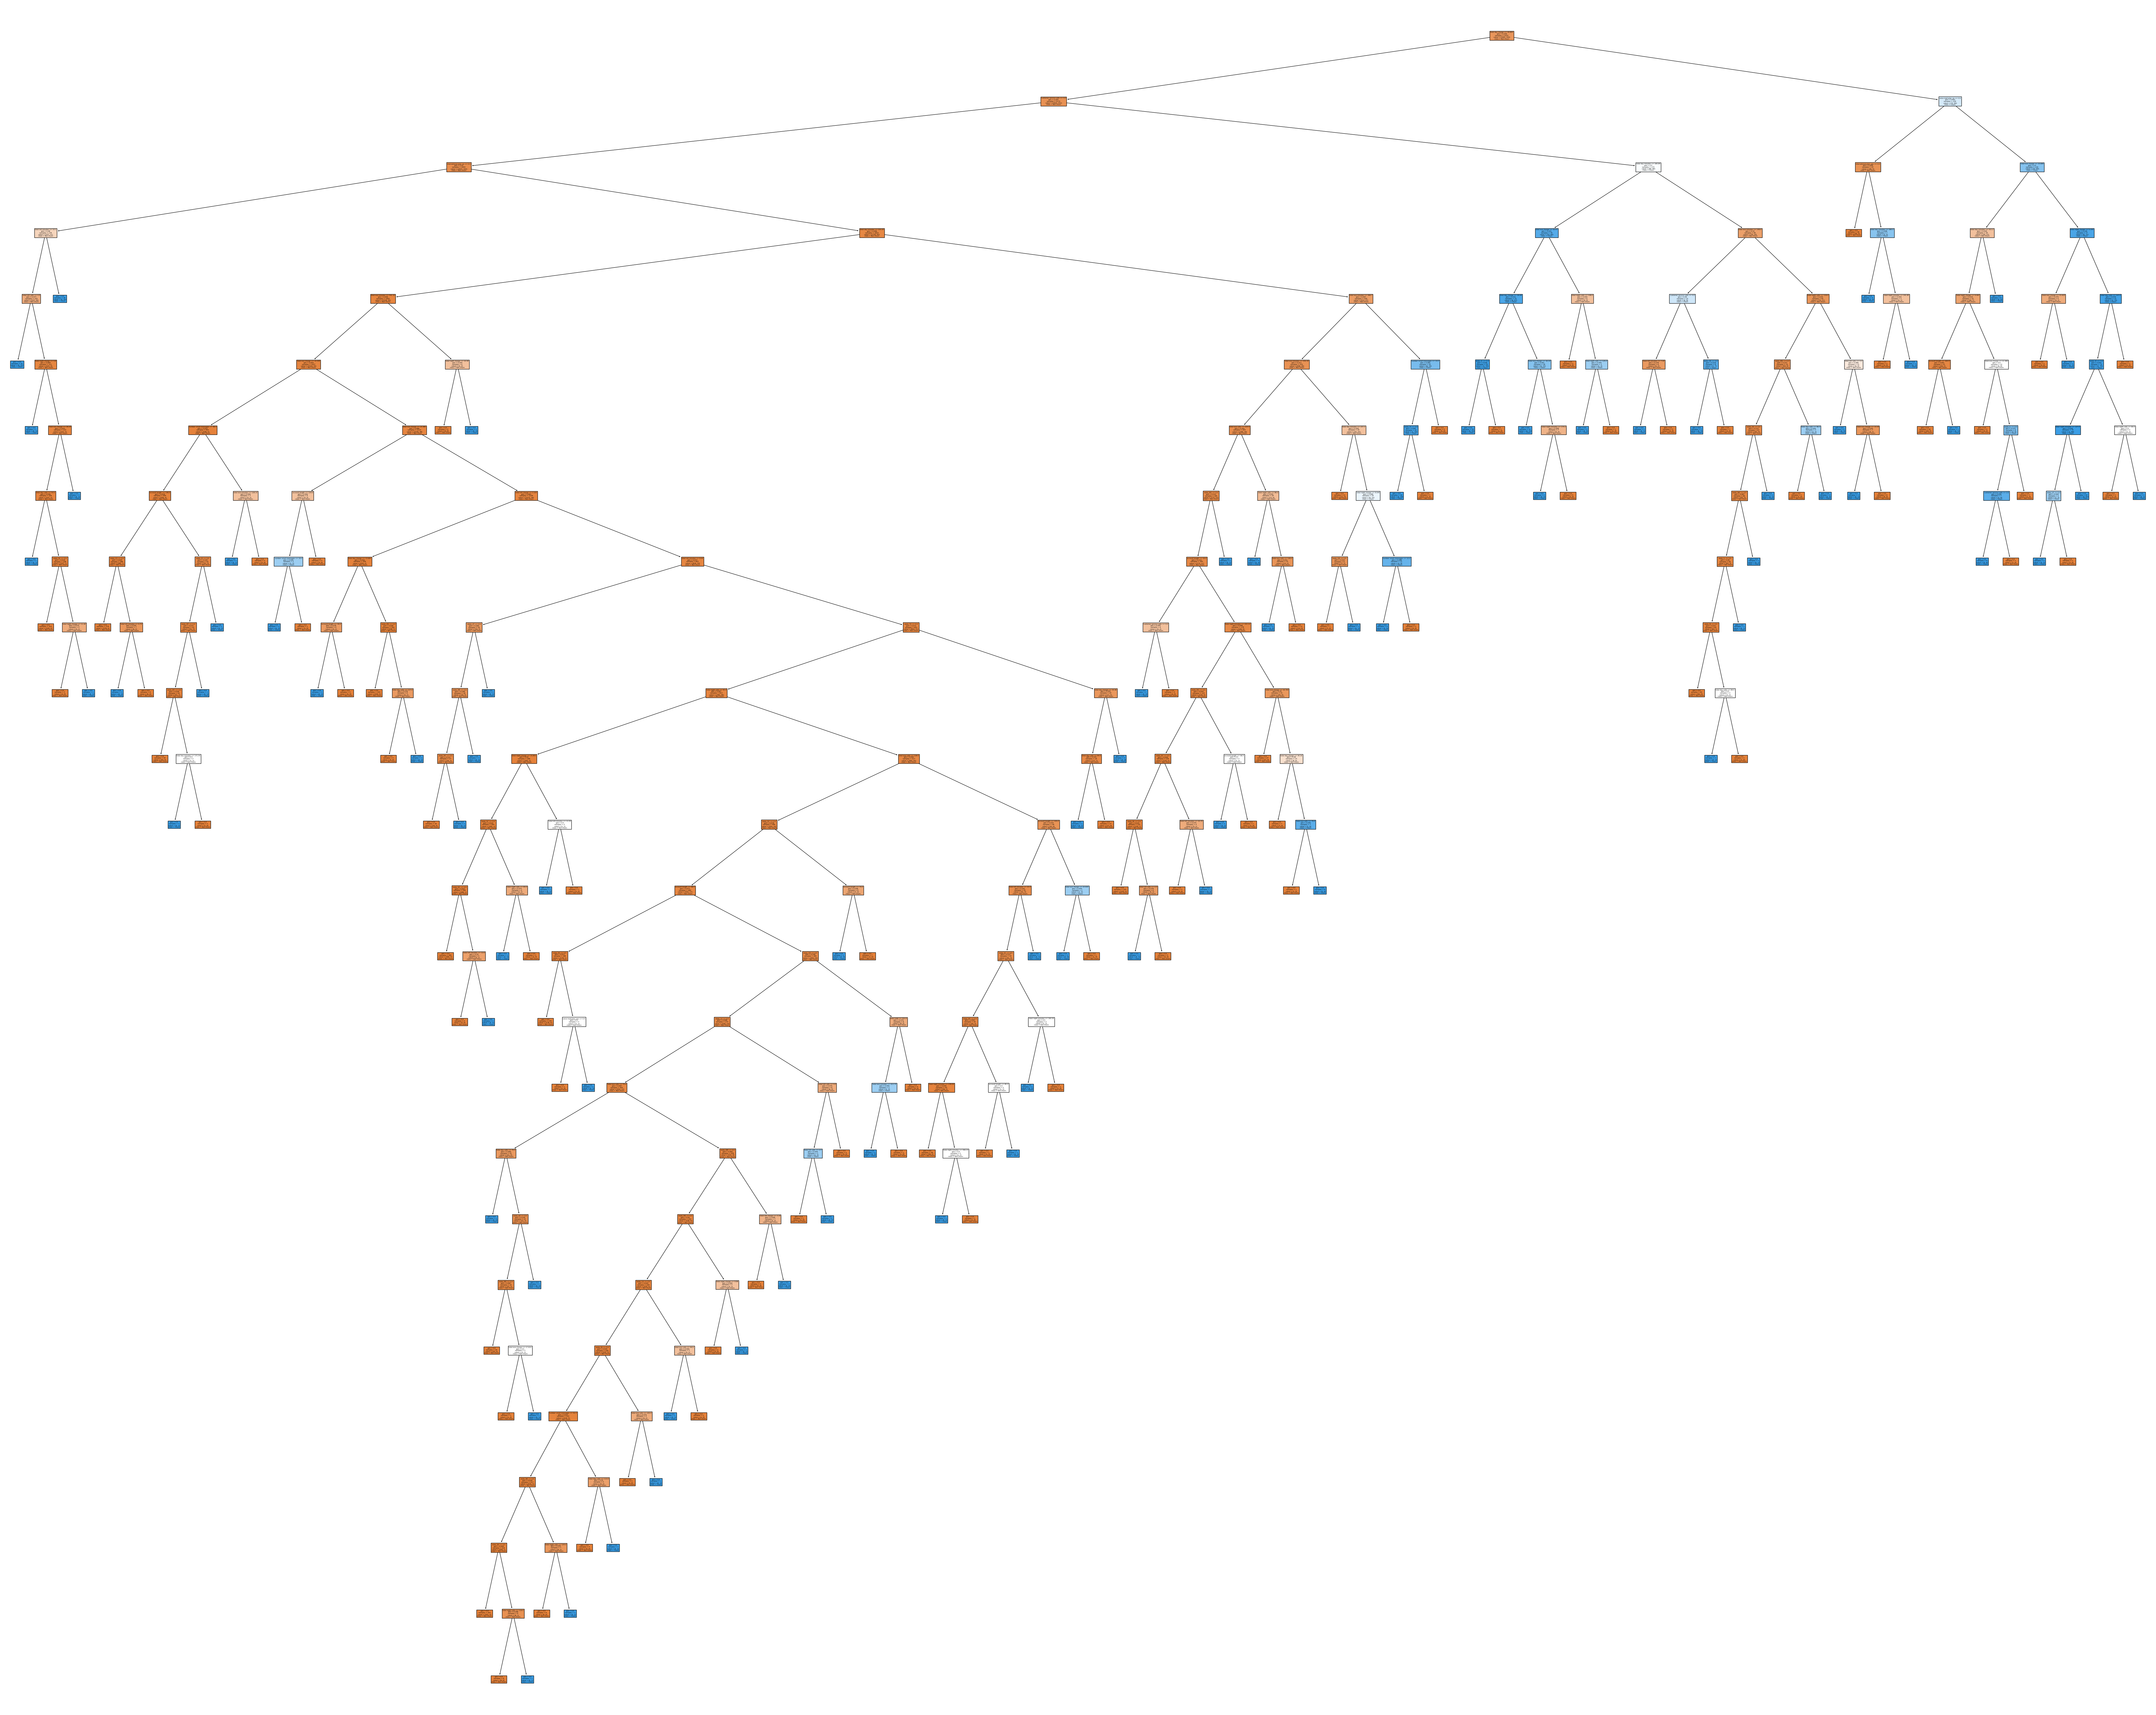

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 80))
plot_tree(model, feature_names=x.columns.tolist(), class_names=['Not Churn', 'Churn'], filled=True)
plt.show()